# Tennis Ace

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Project Goals
I will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, I will determine what it takes to be one of the best tennis players in the world

Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are rovided in file

### Perform EDA (Exploratory Data Analysis)

In [2]:
# load and investigate the data
df = pd.read_csv('tennis_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

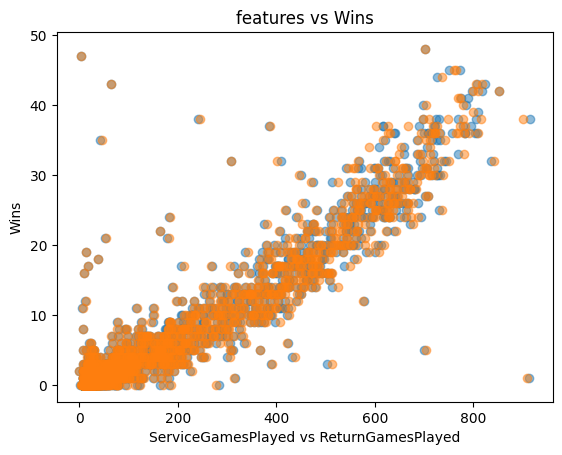

In [10]:
# perform EDA
# plot each feature against each target outcome
# plot ServicesGamesPlayed, ReturnGamePlayed against Wins
plt.scatter(df['ServiceGamesPlayed'], df['Wins'], alpha=0.5)
plt.scatter(df['ReturnGamesPlayed'], df['Wins'], alpha=0.5)
plt.xlabel('ServiceGamesPlayed vs ReturnGamesPlayed')
plt.ylabel('Wins')
plt.title('features vs Wins')
plt.show()

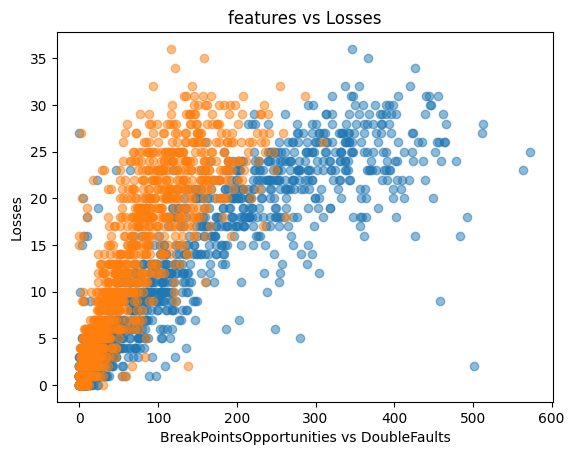

In [13]:
# plot BreakPointsOpportunities, DoubleFaults against Losses
plt.scatter(df['BreakPointsOpportunities'], df['Losses'], alpha=0.5)
plt.scatter(df['DoubleFaults'], df['Losses'], alpha=0.5)
plt.xlabel('BreakPointsOpportunities vs DoubleFaults')
plt.ylabel('Losses')
plt.title('features vs Losses')
plt.show()

### Perform single feature linear regression

In [24]:
# perform with 1 feature and 1 target
feature = df[['BreakPointsOpportunities']]
outcome = df[['Wins']]
# split the data
x_train, x_test, y_train, y_test = train_test_split(feature, outcome, test_size=0.2, random_state=1)
# instantiate 1st Linear model
lr1 = LinearRegression()
# fit data to the model (train the model)
lr1.fit(x_train, y_train)

LinearRegression()

lr1 score: 0.8657873637258577


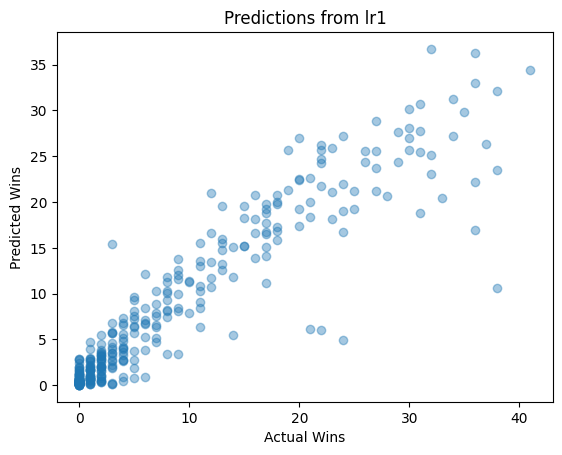

In [25]:
# get the score on the test-set
lr1_score = lr1.score(x_test, y_test)
print(f'lr1 score: {lr1_score}')

# get the predictions
predictions = lr1.predict(x_test)
# plot scatter to see the pattern of the predictions
plt.figure()
plt.scatter(y_test, predictions, alpha=0.4)
plt.title('Predictions from lr1')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()

In [26]:
# get another feature
feature = df[['ReturnGamesPlayed']]
outcome = df[['Wins']]
# split the data
x_train, x_test, y_train, y_test = train_test_split(feature, outcome, test_size=0.2, random_state=1)
# instantiate 2nd Linear model
lr2 = LinearRegression()
# fit data to the model (train the model)
lr2.fit(x_train, y_train)

LinearRegression()

lr2 score: 0.8847620407160456


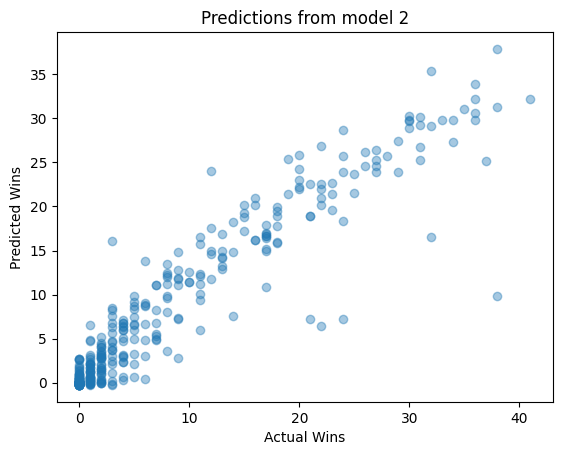

In [27]:
# get the score om the test-set
lr2_score = lr2.score(x_test, y_test)
print(f'lr2 score: {lr2_score}')

# get the predictions
predictions = lr2.predict(x_test)
# plot scatter to see the pattern of the predictions
plt.figure()
plt.scatter(y_test, predictions, alpha=0.4)
plt.title("Predictions from model 2")
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.show()

### Perform two feature linear regressions

In [29]:
# get 2 features
features = df[['BreakPointsOpportunities', 'FirstServeReturnPointsWon']]
# get the 1 target Winnings
outcome = df['Winnings']
# split the data
x_train, x_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=1)
# instantiate another linear model
lr3 = LinearRegression()
# train the model
lr3.fit(x_train, y_train)

LinearRegression()

lr3 score: 0.779104617243723


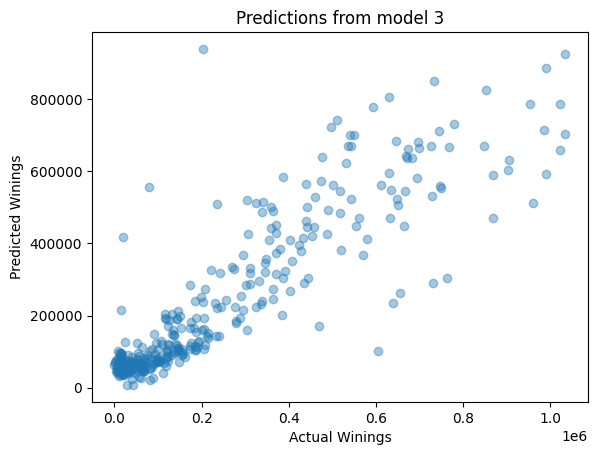

In [30]:
# get the model score
lr3_score = lr3.score(x_test, y_test)
print(f'lr3 score: {lr3_score}')

# get the predictions
predictions = lr3.predict(x_test)
# plot scatter to see the pattern of the predictions
plt.figure()
plt.scatter(y_test, predictions, alpha = 0.4)
plt.title("Predictions from model 3")
plt.xlabel("Actual Winings")
plt.ylabel("Predicted Winings")
plt.show()

### Perform multiple feature linear regressions

In [31]:
# get the multiple features
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
# get 1 target
outcome = df[['Winnings']]
# split the data
x_train, x_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=1)
# instantiate linear model
lr4 = LinearRegression()
# train the model
lr4.fit(x_train, y_train)

LinearRegression()

lr4 score: 0.8149220333672936


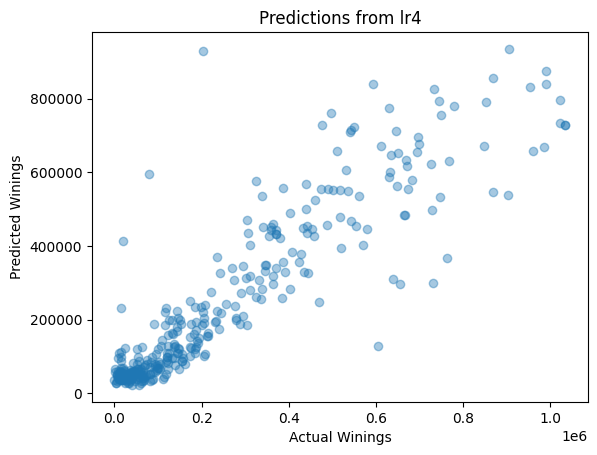

In [32]:
# get lr4 score
lr4_score = lr4.score(x_test, y_test)
print(f"lr4 score: {lr4_score}")

# get the predictions from lr4
predictions = lr4.predict(x_test)
# plot scatter to see the pattern of the predictions
plt.figure()
plt.scatter(y_test, predictions, alpha = 0.4)
plt.title("Predictions from lr4")
plt.xlabel("Actual Winings")
plt.ylabel("Predicted Winings")
plt.show()